**This is a minimal test for population control**

In [1]:
import underworld as uw
import glucifer 

In [2]:
mesh = uw.mesh.FeMesh_Cartesian()

In [3]:
def vanilla_swarm(mesh):
    swarm = uw.swarm.Swarm(mesh)
    swarm.populate_using_layout(uw.swarm.layouts.PerCellGaussLayout(swarm,4))
    return swarm
def draw_swarm(mesh,swarm):
    fig = glucifer.Figure()
    fig.append( glucifer.objects.Points(swarm, colourBar=False, pointSize=4.))
    fig.append( glucifer.objects.Mesh(mesh))
    return fig.show()


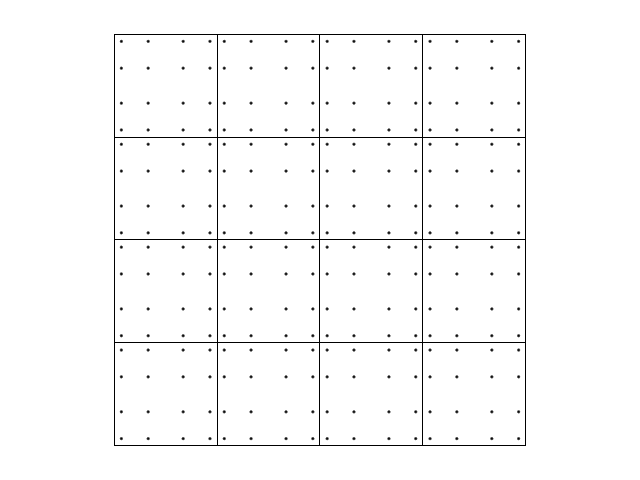

In [4]:
# generated swarm
swarm = vanilla_swarm(mesh)
draw_swarm( mesh, swarm )

In [5]:
swarm.particleGlobalCount

256

In [21]:
uw.swarm.PopulationControl?


In [6]:
# test deleting particles limited by max
swarm = vanilla_swarm(mesh)
population_control = uw.swarm.PopulationControl(swarm,deleteThreshold=1.0,splitThreshold=1.0,maxDeletions=15,maxSplits=0)
population_control.repopulate()
if swarm.particleGlobalCount != 16:
    raise RuntimeError("Incorrect number of particles deleted during population control")
# test deleting particles limited by threshold
swarm = vanilla_swarm(mesh)
population_control = uw.swarm.PopulationControl(swarm,deleteThreshold=0.07,splitThreshold=1.0,maxDeletions=150,maxSplits=0)
population_control.repopulate()
if swarm.particleGlobalCount != 64:
    raise RuntimeError("Incorrect number of particles deleted during population control")

In [7]:
# test splitting particles limited by max
swarm = vanilla_swarm(mesh)
population_control = uw.swarm.PopulationControl(swarm,deleteThreshold=0.,splitThreshold=0.,maxDeletions=0,maxSplits=9999)
population_control.repopulate()
if swarm.particleGlobalCount != 512:
    raise RuntimeError("Incorrect number of particles deleted during population control")
# test deleting particles limited by threshold
swarm = vanilla_swarm(mesh)
population_control = uw.swarm.PopulationControl(swarm,deleteThreshold=0.,splitThreshold=0.07,maxDeletions=0,maxSplits=9999)
population_control.repopulate()
if swarm.particleGlobalCount != 320:
    raise RuntimeError("Incorrect number of particles deleted during population control")

In [18]:
# quick aggressive test
swarm = vanilla_swarm(mesh)
population_control = uw.swarm.PopulationControl(swarm,deleteThreshold=0.,splitThreshold=1.,maxDeletions=0,maxSplits=0, aggressive=True, particlesPerCell=40)
#population_control.repopulate()
if swarm.particleGlobalCount != 640:
    raise RuntimeError("Incorrect number of particles deleted during population control")

RuntimeError: Incorrect number of particles deleted during population control


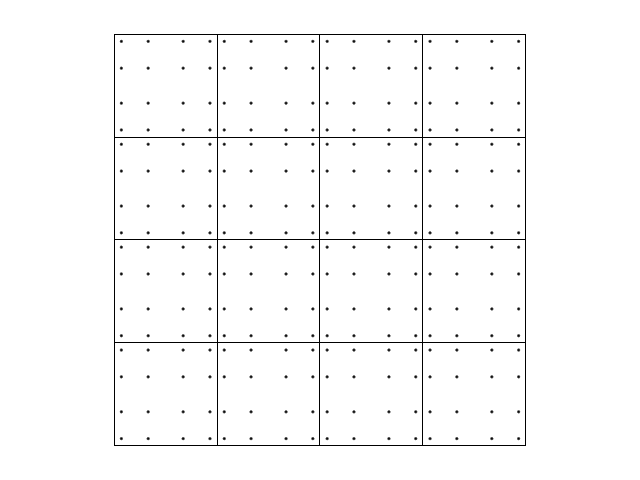

In [19]:
# generated swarm
#swarm = vanilla_swarm(mesh)
draw_swarm( mesh, swarm )